## Fundamental CNN
1. Input Data (Gambar)
- Gambar sederhana → input
2. Kernel / Filter
- Kernel acak → filter
3. Convolution Operation
- Konvolusi → feature map
4. Prediction & Loss Function
- Loss → ukuran kesalahan
5. Backpropagation & Gradient
- Backprop → update kernel
6. Training Loop
- Training loop → proses belajar >> kernel -= lr * grad
7. Visualisasi Kernel & Loss
- Visualisasi → bukti kernel belajar

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Bentuk :  (12, 12)
Matrik asli : 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 Bentuk Norm :  (12, 12)

 Matrik Norm : 
 [[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255.

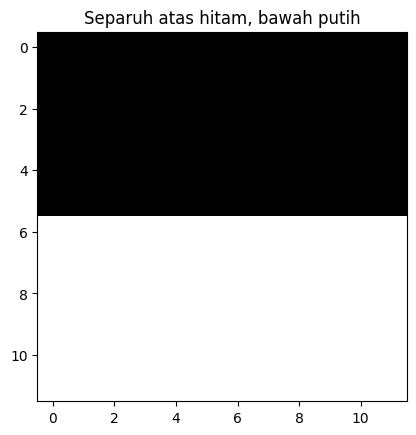

In [ ]:
# Membuat gambar 32×32 separuh atas hitam, separuh bawah putih (grayscale)
import numpy as np
import matplotlib.pyplot as plt
# Buat gambar 12x12 grayscale
img = np.zeros((12, 12), dtype=np.float32)
print("Bentuk : " ,img.shape)
print("Matrik asli : \n" ,img[:10])
img[6:] = 255 # separuh bawah putih
print("\n Bentuk Norm : " ,img.shape)
print("\n Matrik Norm : \n" ,img[:10])
# semua hitam
plt.imshow(img, cmap='gray')
plt.title("Separuh atas hitam, bawah putih")
plt.show()

Nilai piksel min: 0.0
Nilai piksel max: 1.0
Bentuk :  (12, 12)
Matrik asli : 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


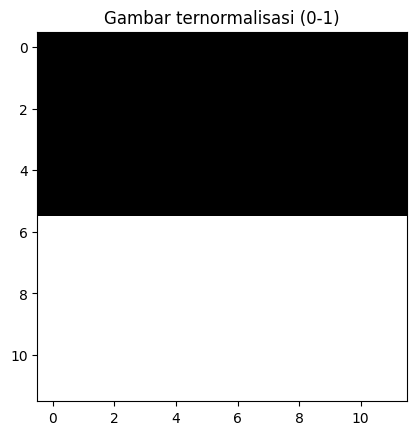

In [ ]:
# Normalisasi gambar ke skala 0–1
img_norm = img / 255.0
print("Nilai piksel min:", img_norm.min())
print("Nilai piksel max:", img_norm.max())
print("Bentuk : " ,img_norm.shape)
print("Matrik asli : \n" ,img_norm[:10])
plt.imshow(img_norm, cmap='gray')
plt.title("Gambar ternormalisasi (0-1)")
plt.show()

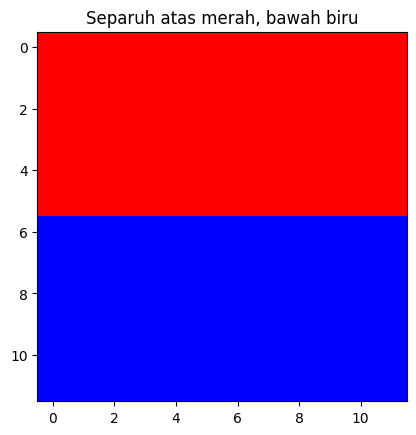

Shape RGB: (12, 12, 3)

 Matrik R :
 [[255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]

 Matrik G :
 [[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

 Matrik B 

In [ ]:
# Membuat gambar RGB sederhana
import numpy as np
import matplotlib.pyplot as plt

# Membuat gambar RGB dengan pola warna
img_rgb = np.zeros((12, 12, 3), dtype=np.uint8)

# separuh atas merah
img_rgb[:6, :, 0] = 255  # channel R
# separuh bawah biru
img_rgb[6:, :, 2] = 255  # channel B

plt.imshow(img_rgb)
plt.title("Separuh atas merah, bawah biru")
plt.show()

# Mengecek shape
print("Shape RGB:", img_rgb.shape)   # (12, 12, 3)

# Menampilkan matriks tiap channel
print("\n Matrik R :\n", img_rgb[:12, :12, 0])  # channel R
print("\n Matrik G :\n", img_rgb[:12, :12, 1])  # channel G
print("\n Matrik B :\n", img_rgb[:12, :12, 2])  # channel B


In [ ]:
# Membuat batch input (beberapa gambar sekaligus)
batch = np.zeros((10, 32, 32, 1), dtype=np.float32) # 10 gambar, grayscale
print("Shape batch:", batch.shape) # (10, 32, 32, 1)

Shape batch: (10, 32, 32, 1)


Bentuk :  (28, 28)
Matrik asli :  [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]]

 Bentuk Norm :  (28, 28)

 Matrik Norm :  [[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.16078431 0.7372549
  0.40392157 0.21176471 0.18823529 0.16862745 0.34117647 0.65882353
  0.52156863 0.0627451  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0. 

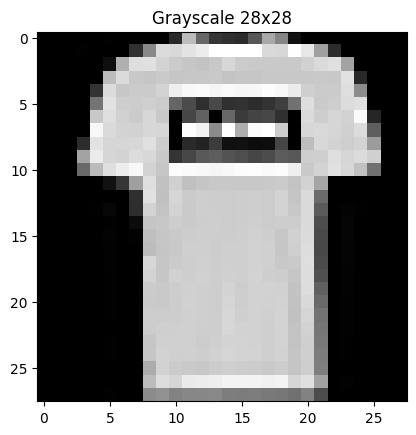

In [ ]:
# Load gambar asli menjadi grayscale 32×32
import cv2
import matplotlib.pyplot as plt

# Load gambar asli (misalnya "gambar.jpg") dalam mode grayscale
img_gray = cv2.imread("data/fashion/kaos.png", cv2.IMREAD_GRAYSCALE)

# Resize ke 28x28
img_gray_resized = cv2.resize(img_gray, (28, 28))
print("Bentuk : " ,img_gray_resized.shape)
print("Matrik asli : " ,img_gray_resized[:5])

# Normalisasi ke skala 0-1 (opsional)
img_gray_norm = img_gray_resized / 255.0
print("\n Bentuk Norm : " ,img_gray_norm.shape)
print("\n Matrik Norm : " ,img_gray_norm[:5])

print("Shape grayscale:", img_gray_resized.shape)  # (28, 28)

# Visualisasi
plt.imshow(img_gray_resized, cmap='gray')
plt.title("Grayscale 28x28")
plt.show()

cv2.IMREAD_GRAYSCALE → langsung baca gambar jadi 1 channel.

cv2.resize(img, (width, height)) → ubah ukuran.

Shape grayscale: (32, 32)


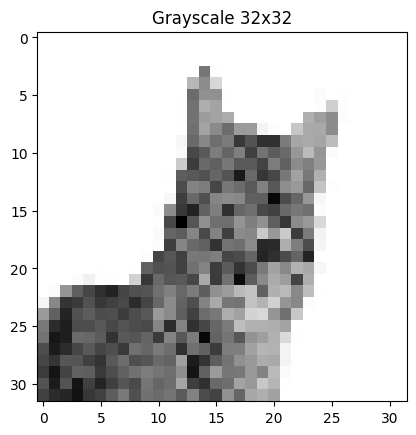

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load gambar asli (misalnya "gambar.jpg") dalam mode grayscale
img_gray = cv2.imread("data/lain/cat.jpeg", cv2.IMREAD_GRAYSCALE)

# Resize ke 32x32
img_gray_resized = cv2.resize(img_gray, (32, 32))

# Normalisasi ke skala 0-1 (opsional)
img_gray_norm = img_gray_resized / 255.0

print("Shape grayscale:", img_gray_resized.shape)  # (32, 32)

# Visualisasi
plt.imshow(img_gray_resized, cmap='gray')
plt.title("Grayscale 32x32")
plt.show()

Shape RGB: (224, 224, 3)


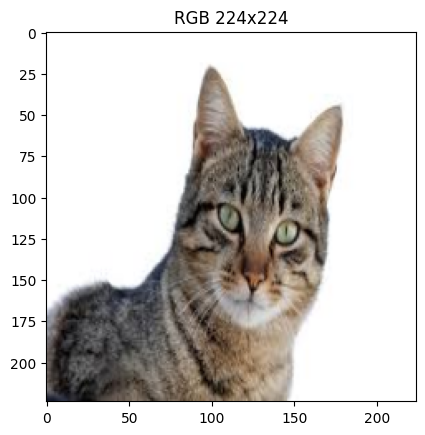

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load gambar asli dalam mode BGR (default OpenCV)
img_bgr = cv2.imread("data/lain/cat.jpeg", cv2.IMREAD_COLOR)

# Konversi BGR → RGB (karena OpenCV default BGR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Resize ke 224x224
img_rgb_resized = cv2.resize(img_rgb, (224, 224))

# Normalisasi ke skala 0-1 (opsional)
img_rgb_norm = img_rgb_resized / 255.0

print("Shape RGB:", img_rgb_resized.shape)  # (224, 224, 3)

# Visualisasi
plt.imshow(img_rgb_resized)
plt.title("RGB 224x224")
plt.show()

OpenCV default baca gambar sebagai BGR, jadi perlu cv2.cvtColor(..., cv2.COLOR_BGR2RGB).

- Grayscale → (H, W) atau (H, W, 1)
- RGB → (H, W, 3)

- Resize sesuai kebutuhan model (misalnya 32×32 untuk eksperimen, 224×224 untuk CNN populer seperti ResNet).
- Normalisasi → penting untuk stabilitas training.

Shape batch: (3, 64, 64, 3)


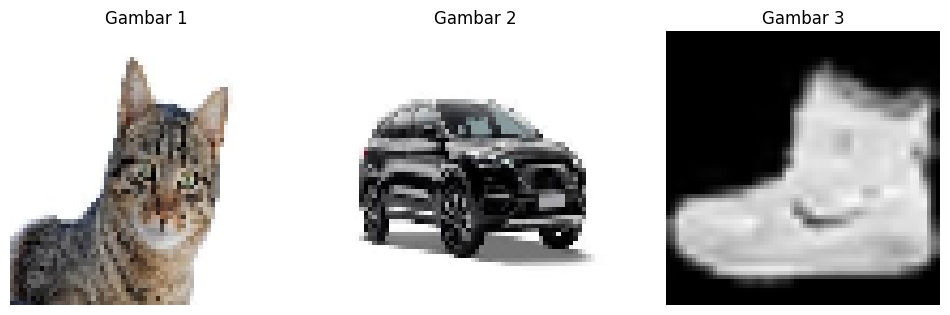

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Daftar file gambar
files = ["data/lain/cat.jpeg", "data/lain/gambar1.jpeg", "data/lain/gambar1.png"]

# Parameter ukuran target (misalnya 64x64 RGB)
target_size = (64, 64)

batch = []

for f in files:
    # Load gambar dalam mode BGR
    img_bgr = cv2.imread(f, cv2.IMREAD_COLOR)
    
    # Konversi ke RGB
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # Resize ke target size
    img_resized = cv2.resize(img_rgb, target_size)
    
    # Normalisasi ke skala 0-1
    img_norm = img_resized / 255.0
    
    # Tambahkan ke batch
    batch.append(img_norm)

# Ubah list menjadi numpy array
batch_array = np.array(batch, dtype=np.float32)

print("Shape batch:", batch_array.shape)  # (3, 64, 64, 3)

# Visualisasi ketiga gambar
fig, axes = plt.subplots(1, 3, figsize=(12,4))
for i, ax in enumerate(axes):
    ax.imshow(batch_array[i])
    ax.set_title(f"Gambar {i+1}")
    ax.axis("off")
plt.show()

- Looping file gambar → memuat semua gambar dari folder /data.
- Resize → seragamkan ukuran (misalnya 64×64).
- Konversi BGR → RGB → karena OpenCV default BGR.
- Normalisasi → skala 0–1 agar siap masuk ke CNN.
- Batch array → hasil akhir (N, H, W, C) → di sini (3, 64, 64, 3).

Ditemukan file: ['data/lain/gambar1.jpeg', 'data/lain/cat.jpeg', 'data/lain/gambar1.png']
Shape batch: (3, 64, 64, 3)


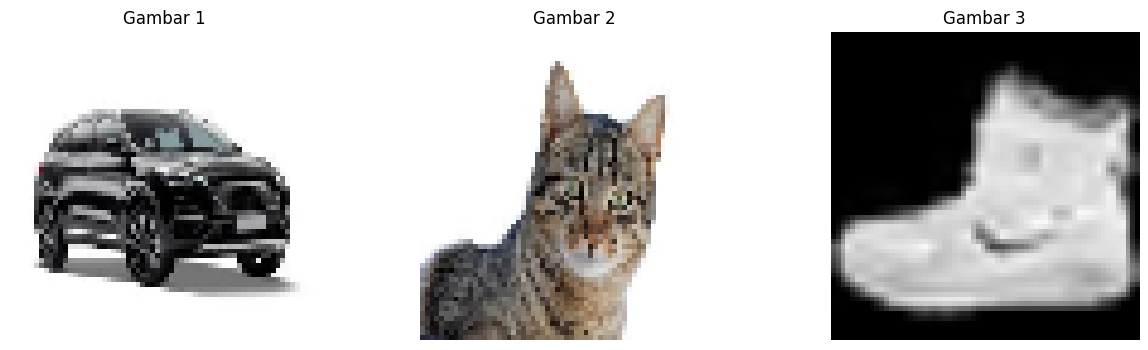

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Folder tempat gambar disimpan
folder_path = "data/lain/"   # misalnya folder bernama 'data'

# Ambil semua file .jpg dalam folder
files = glob.glob(os.path.join(folder_path, "*.*"))

print("Ditemukan file:", files)

# Parameter ukuran target (misalnya 64x64 RGB)
target_size = (64, 64)

batch = []

for f in files:
    # Load gambar dalam mode BGR
    img_bgr = cv2.imread(f, cv2.IMREAD_COLOR)
    
    # Konversi ke RGB
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # Resize ke target size
    img_resized = cv2.resize(img_rgb, target_size)
    
    # Normalisasi ke skala 0-1
    img_norm = img_resized / 255.0
    
    # Tambahkan ke batch
    batch.append(img_norm)

# Ubah list menjadi numpy array
batch_array = np.array(batch, dtype=np.float32)

print("Shape batch:", batch_array.shape)  # (N, 64, 64, 3)

# Visualisasi beberapa gambar
fig, axes = plt.subplots(1, min(len(batch_array), 5), figsize=(15,4))
for i, ax in enumerate(axes):
    ax.imshow(batch_array[i])
    ax.set_title(f"Gambar {i+1}")
    ax.axis("off")
plt.show()

glob.glob("*.jpg") → otomatis mencari semua file .jpg dalam folder.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

Shape grayscale: (187, 270, 1)


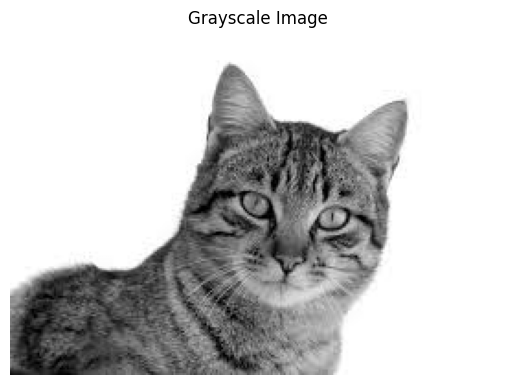

In [2]:

# Baca file gambar grayscale
img = tf.io.read_file("cat.jpeg")
img = tf.image.decode_png(img, channels=1)   # 1 channel = grayscale
img = tf.image.convert_image_dtype(img, tf.float32)  # normalisasi 0–1

print("Shape grayscale:", img.shape)  # contoh: (28, 28, 1)

# Plot
plt.imshow(tf.squeeze(img), cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

Shape RGB: (187, 270, 3)


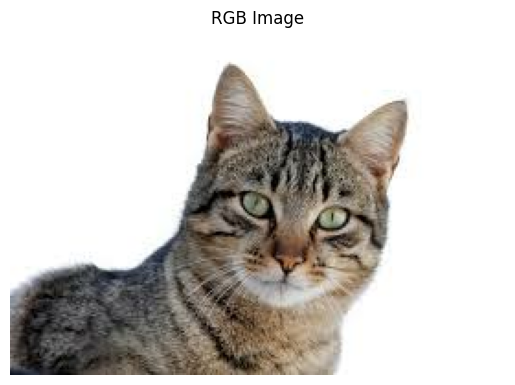

In [3]:
# Baca file gambar RGB
img_rgb = tf.io.read_file("cat.jpeg")
img_rgb = tf.image.decode_png(img_rgb, channels=3)   # 3 channel = RGB
img_rgb = tf.image.convert_image_dtype(img_rgb, tf.float32)

print("Shape RGB:", img_rgb.shape)  # contoh: (128, 128, 3)

# Plot
plt.imshow(img_rgb)
plt.title("RGB Image")
plt.axis("off")
plt.show()


Found 5 files belonging to 4 classes.
Batch shape: (5, 128, 128, 3)
Label shape: (5,)


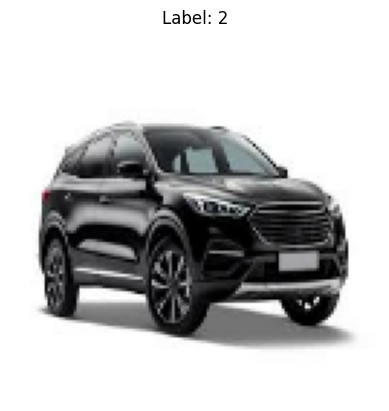

2025-12-14 16:07:41.532926: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
dataset = tf.keras.utils.image_dataset_from_directory(
    "data",          # path folder
    image_size=(128,128), # resize otomatis
    color_mode="rgb",     # bisa "grayscale" atau "rgb"
    batch_size=32
)

# Ambil batch pertama
for images, labels in dataset.take(1):
    print("Batch shape:", images.shape)   # (32, 128, 128, 3)
    print("Label shape:", labels.shape)   # (32,)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Label: {labels[0].numpy()}")
    plt.axis("off")
    plt.show()


📊 Ringkasan Shape
- Input Type	Shape Contoh	Catatan
- Grayscale	(28, 28, 1)	1 channel
- RGB	(128, 128, 3)	3 channel
- Folder Batch	(32, 128, 128, 3)	batch 32 gambar